In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import time
from pathlib import Path
from sklearn import preprocessing

In [2]:
station_info = pd.read_csv("StationInfo.csv")
stations = list(station_info['StationID'])
latitude = list(station_info['Latitude'])
longitude = list(station_info['Longitude'])

In [3]:
# a function that takes the latitdue and longtitude, 
# the division info and the station info
# and returns the area division of the stations
def area_division(station_lst, latitude_lst, longitude_lst, hor_n, ver_n):
    
    assert(len(station_lst)==len(latitude_lst))
    assert(len(station_lst)==len(longitude_lst))
    
    min_latitude = min(latitude_lst)
    min_longitude = min(longitude_lst)
    max_latitude = max(latitude_lst)
    max_longitude = max(longitude_lst)
    #print(min_latitude, min_longitude, max_latitude, max_longitude)
    latitude_chunk = (max_latitude - min_latitude)/ver_n
    longitude_chunk = (max_longitude - min_longitude)/hor_n
    #print(latitude_chunk, longitude_chunk)
    
    latitude = min_latitude
    longitude = min_longitude
    
    output_arr = []
    for i in range(ver_n):
        output_arr.append([])
        longitude = min_longitude
        for j in range(hor_n):
            #print("Longitude range: ",longitude, longitude + longitude_chunk)
            #print("Latitude range: ",latitude, latitude + latitude_chunk)
            #print("")
            output_arr[i].append([])
            for k in range(len(station_lst)):
                lat = latitude_lst[k]
                lon = longitude_lst[k]
                if (lat >= latitude and lat < latitude + latitude_chunk) and (lon >= longitude and lon < longitude + longitude_chunk):
                    output_arr[i][j].append(station_lst[k])
            longitude = longitude + longitude_chunk
        latitude = latitude + latitude_chunk
        
        
        
    #print(output_arr)
    output_lst = []
    for i in range(ver_n):
        for j in range(hor_n):
            output_lst.append(output_arr[i][j])
    #print(output_lst)
    return output_lst



In [4]:
# print divided area by 3*3
areas = area_division(stations, latitude, longitude, 3, 3)
print(areas)

[[36, 51, 113, 137, 138, 140, 152, 161, 171, 186, 220, 226, 306, 60157], [24, 29, 106, 142, 146, 155, 156, 327, 332, 50117], [], [55, 82, 119, 131, 164, 165, 174, 175, 206, 231, 243, 303, 308, 313, 318, 60139], [32, 33, 35, 38, 39, 41, 73, 78, 87, 94, 96, 101, 105, 109, 130, 132, 149, 151, 153, 177, 181, 193, 200, 223, 225, 229, 247, 255, 256, 302, 307, 309, 314, 315, 316, 320, 329, 40047, 60195, 60251], [47, 48, 75, 77, 84, 120, 147, 148, 240, 254, 304, 305, 317, 319, 321, 322, 324, 326, 328, 331, 333, 334, 335, 339, 352, 355], [59, 122, 127, 133, 246], [26, 88, 93, 98, 107, 124, 125, 128, 159, 170, 182, 184, 201, 221, 236, 250, 310], [19, 43, 90, 91, 99, 115, 116, 121, 129, 141, 150, 166, 167, 169, 172, 183, 188, 189, 191, 197, 198, 202, 204, 212, 214, 228, 235, 238, 60241]]


In [5]:
# A function that normalize all the features by min-max in a 
# particular file
# file_name: the name of the file that needs to be normalized
# attribute_type: string, "magn" or "sound"
# station_group: an integer indicating the station area group
def normalize_file(file_name, attribute_type, station_group):
    #file_name = "./training/" + attribute_type + "/" + str(station_id) + "_" + attribute_type +".csv"
    data = pd.read_csv(file_name)
    
    for column in data.columns:
        if column != "StationID" and column != "TimeStamp":
            
            x = data[[column]].values.astype(float)
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(x)
            column_normalized = pd.DataFrame(x_scaled)
            
            
            x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
          
            
            data[column] = column_normalized
    data.to_csv("./training/" + attribute_type + "/normalized/" + str(station_group) + "_normalized_" + attribute_type + ".csv", index = False, header=True)

#normalized("./training/magn/36_magn.csv", "magn",0)

In [13]:

# merge data by area
# stations: 2d array, stations grouped by area
# attribute_type: string, "magn" or "sound"
def merge_data(stations, attribute_type):
    
    for i in range(len(stations)):
        group = stations[i]
        dfs = []

        for station in group:
            file_name = "./training/"  + attribute_type + "/normalized/" + str(station) + "_normalized_" + attribute_type +".csv"
            #print(file_name)
            if Path(file_name).exists():
                data = pd.read_csv(file_name)
                dfs.append(data)
                
        #print(dfs)
        if group is not None and len(group)>0:
            merged_data = pd.concat(dfs)
            merged_data = merged_data.sort_values(by='TimeStamp', ascending=True)
            # You need a "merged" file under "magn" or "sound" file
            merged_data.to_csv("./training/" + attribute_type + "/" + "merged/" + str(i) + "_merged_" + attribute_type + ".csv", index = False, header=True)
        
# merge_data(areas, "magn")

In [8]:
# Normalize all the original magn files to "./training/magn/normalized" file
attribute_type = "magn"
for i in range(len(areas)):
    group = areas[i]
    if group is not None and len(group)>0:
        for station in group:
            file_name = "./training/" + attribute_type + "/" + str(station) + "_" + attribute_type +".csv"
            if Path(file_name).exists():
                normalize_file(file_name, "magn", station)
                
            

KeyboardInterrupt: 

In [8]:
merge_data(areas, "magn")

In [10]:
# Normalize all the original magn files to "./training/magn/normalized" file
attribute_type = "sound"
for i in range(len(areas)):
    group = areas[i]
    if group is not None and len(group)>0:
        for station in group:
            file_name = "./training/" + attribute_type + "/" + str(station) + "_" + attribute_type +".csv"
            if Path(file_name).exists():
                normalize_file(file_name, "sound", station)

In [14]:
merge_data(areas, "sound")

In [ ]:
########### DRAW PICTURES #############

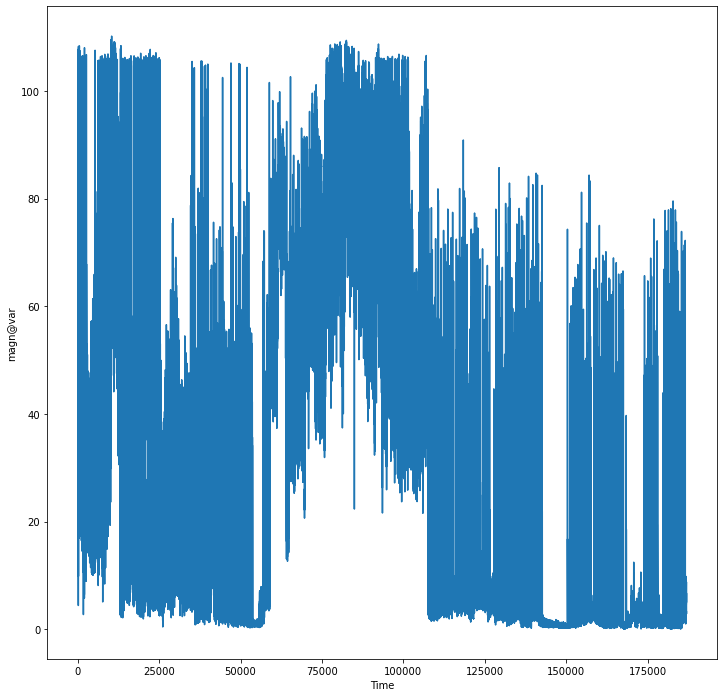

In [9]:
magn_19 = pd.read_csv("./training/magn/19_magn.csv")
column = "magn@var"
feature = magn_19[[column]]
feature = feature.reset_index()
feature.columns = ['index',column]
x = feature['index']
y = feature[column]
plt.figure(figsize=(12,12)) #创建绘图对象
plt.plot(x,y)   
plt.xlabel("Time") #X轴标签
plt.ylabel(column)  #Y轴标签
plt.show()

In [ ]:
# Draw pictures of the feature
def draw_pic(feature_, area_number, attribute_type):
    file_name = "./training/" + attribute_type + "/merged/" + str(area_number) + "_merged_" + attribute_type + ".csv"
    data = pd.read_csv(file_name)
    
    #feature = magn_19[[feature_]]
    
    ### X axis: index
#     feature = feature.reset_index()
#     feature.columns = ['index',column]
#     x = feature['index']
#     y = feature[column]
#     plt.figure(figsize=(12,12)) #创建绘图对象
#     plt.plot(x,y)   
#     plt.xlabel("Time") #X轴标签
#     plt.ylabel(column)  #Y轴标签
#     plt.show()
    plt.plot(feature['TimeStamp'], data[feature_])
    plt.xlabel("TimeStamp") #X轴标签
    plt.ylabel(feature_)  #Y轴标签
    
draw_pic("magn@var", 0, "magn")

In [57]:
import pandas as pd
from sklearn import preprocessing

temp = pd.read_csv("./training/magn/36_magn.csv")
x = temp[['magn@var']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
temp['magn@var'] = df_normalized
print(temp)

        StationID   TimeStamp  magn@var  magn@power  magn@skew  magn@kurt  \
0              36  1528258200  0.021921    0.892192   0.005143  -1.403910   
1              36  1528258800  0.021923    0.892293   0.007506  -1.379777   
2              36  1528259400  0.021587    0.878673   0.006596  -1.367440   
3              36  1528260000  0.021140    0.860474   0.006796  -1.405155   
4              36  1528260600  0.021675    0.882263   0.009643  -1.449690   
...           ...         ...       ...         ...        ...        ...   
101063         36  1606749000  0.000516    0.021933  -0.434881  -0.893527   
101064         36  1606749600  0.000493    0.020994  -0.432452  -0.783762   
101065         36  1606750200  0.000507    0.021556  -0.445749  -0.933391   
101066         36  1606750800  0.000491    0.020931  -0.444884  -1.045843   
101067         36  1606751400  0.000480    0.020449  -0.463154  -1.108705   

        magn@abs_max  magn@abs_mean  magn@abs_max_top5p  magn@abs_max_top10

In [33]:
a = pd.read_csv("./training/magn/36_magn.csv")
b = pd.read_csv("./training/magn/51_magn.csv")
print(a.shape, b.shape)
a_b = pd.concat([a,b])
print(a_b.shape)

(101068, 53) (195583, 53)
(296651, 53)


In [31]:
temp = pd.read_csv("./training/magn/36_magn.csv")
n = list(temp['TimeStamp'])[0]
time_local = time.localtime(n)
dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
print(dt)

2018-06-06 14:10:00
2017-01-25 19:00:00
2017-12-19 20:00:00


In [54]:
aa = pd.read_csv("./training/magn/19_magn.csv")
aa = aa.sort_values(by='magn@var',ascending = True)
print(aa)

        StationID   TimeStamp    magn@var  magn@power  magn@skew  magn@kurt  \
167786         19  1595265000    0.019992    0.020166  -0.042052  -1.062664   
167785         19  1595264400    0.021583    0.021756  -0.020336  -1.294264   
182029         19  1603810800    0.022893    0.023044  -0.052239  -1.406277   
167784         19  1595263800    0.023112    0.023285  -0.018827  -1.260755   
167783         19  1595263200    0.023222    0.023396  -0.035570  -1.051072   
...           ...         ...         ...         ...        ...        ...   
82505          19  1535987400  109.121000  109.329000  -0.078994  -1.787573   
10406          19  1489725600  109.237000  109.256000  -0.027515  -1.786110   
82479          19  1535971800  109.386333  109.399667  -0.020842  -1.798963   
10228          19  1489618800  109.539000  109.643000  -0.059601  -1.780590   
10410          19  1489728000  110.174000  110.212000  -0.035200  -1.781930   

        magn@abs_max  magn@abs_mean  magn@abs_max_t